## Binomial Logistic Regression using Gradient Descent with L2 Regularization (Python)

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [70]:
train_data = pd.read_csv('train_dataset.csv')
test_data = pd.read_csv('test_dataset.csv')
# Seperate input from output
x_train = train_data[['x1', 'x2']].values
y_train = train_data['y'].values
x_test = test_data[['x1', 'x2']].values
y_test = test_data['y'].values

In [71]:
x_train.shape, x_test.shape

((80, 2), (20, 2))

In [72]:
def normalize(x): # Rescale
    x_mins = np.min(x, axis=0)
    x_maxs = np.max(x, axis=0)
    min_max_range = x_maxs - x_mins
    norm_x = np.divide((x - x_mins), min_max_range)
    return norm_x

In [73]:
def standardized(x): # Normalize with mean 0 and std-dev of 1, also called z-score 
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    stdz_x = np.divide((x - x_mean), x_std)
    return stdz_x

In [74]:
# Rescaled and standarized input
x_train_rescaled = normalize(x_train)
x_train_standarized = standardized(x_train)

#### Function definitions

In [75]:
def net_input(theta_coeff, x):
    # compute the weighted sum of inputs
    return x.dot(theta_coeff)

In [76]:
def sigmoid(x):
    # Activation function used to map input between 0 and 1
    return np.divide(1, (1 + np.exp(-x)))

In [77]:
def probability(theta_coeff, x):
    # Returns the probability for each of the weighted inputs wrt to sigmoidal function
    return sigmoid(net_input(theta_coeff, x))

In [78]:
def cost_function(theta_coeff, x, y, regularization_rate):
    # Computes the cost/error of using theta_coeff as coefficients wrt to training data
    return (-(1/x.shape[0]) * np.sum((y * np.log(probability(theta_coeff, x))) 
                                    + ((1-y) * np.log(1 - probability(theta_coeff, x))))) + ((regularization_rate * np.sum(np.concatenate(([0],theta_coeff[1:]))**2))/(2*x.shape[0]))

In [79]:
def compute_gradients(theta_coeff, x, y, regularization_rate):
    # Array of computed gradients for each of the coefficients (1 x num_of_coefficients)
    # Factors in example wise error for parameters Eg: (example_error_n * param_j)
    return (1/x.shape[0]) * np.dot(x.T, (probability(theta_coeff, x) - y)) + ((regularization_rate * np.concatenate(([0],theta_coeff[1:])))/x.shape[0])

In [80]:
def gradient_descent(x, y, iterations, learning_rate, regularization_rate):
    """
    Returns:
    theta_coeff(array): Best set of coefficients for the linear model (1 x num_of_coefficients)
    cost_history(array): Cost history wrt to coefficients computed while performing the descent
    """
    # Container to store cost history as the descent progresses
    cost_history = []
    
    # Initialize coefficients with random values
    theta_coeff = np.array([0] * x.shape[1])
    
    print(theta_coeff)
    for iteration in range(iterations):
        # Compute gradient with respect to initialized theta_coeff
        gradients = compute_gradients(theta_coeff, x, y, regularization_rate)
        # Alter the theta_coeff(parameters) using the directional movement(descent) suggested by gradient
        theta_coeff = theta_coeff - (learning_rate * gradients)
        # Compute the cost of using new theta_coeff as parameters for the model
        cost = cost_function(theta_coeff, x, y, regularization_rate)
        cost_history.append(cost) # Store the new cost
    return theta_coeff, cost_history

In [81]:
## Prepare data
# Learning rate
alpha = 0.001
# L2 regularization
# Kept regularization_rate to be small, because the training and testing sets are very similar, we are already doing good job at generalizing.
# Higher regularization_rate can be used in cases where training and testing sets differ by substantial amount, and we seek to generalize on such differing unseen data 
regularization_rate = 0.03
# Bias variable 
bias_variable = np.ones(len(x_train))
# Plug input along with bias_variable
x_train_biased = np.column_stack([bias_variable, x_train])

In [82]:
best_theta_coeff, cost_history = gradient_descent(x_train_biased, y_train, 100000, alpha, regularization_rate)

[0 0 0]


In [83]:
cost_history[-1]

0.03615274900066509

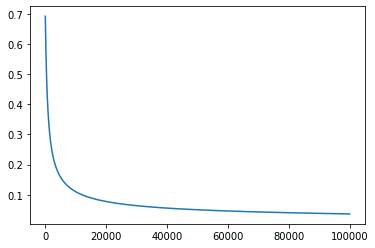

In [84]:
plt.plot(cost_history)

#### Model Evaluation

In [85]:
def get_predictions(theta_coeff, x_input):
    # Bias variable 
    bias_variable = np.ones(len(x_input))
    # Plug input along with bias_variable
    new_x_input = np.column_stack([bias_variable, x_input])
    # Compute output values with new coefficients
    preds = probability(theta_coeff, new_x_input)
    return preds

In [86]:
def accuracy(theta_coeff, x, y, threshold=0.5):
    class_preds = (get_predictions(theta_coeff, x) >= 0.5).astype(int).flatten()
    accuracy = np.mean(class_preds == y) * 100
    return accuracy

In [87]:
y_pred_train = get_predictions(best_theta_coeff, x_train)
y_pred_test = get_predictions(best_theta_coeff, x_test)

In [88]:
train_acc = accuracy(best_theta_coeff, x_train, y_train)
test_acc = accuracy(best_theta_coeff, x_test, y_test)

In [89]:
print(f"Training accuracy = {train_acc}")
print(f"Testing accuracy = {test_acc}")

Training accuracy = 98.75
Testing accuracy = 100.0
